# TASK 3 OF INTERNSHIP AT THE SPARKS FOUNDATION

# AUTHOR : VAISHNAVI PATIL

# DESCRIPTION: As a business manager, try to find out the weak areas where you can
#              work to make more profit.

In [1]:
import numpy  as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.io as pio  
import plotly.express as px

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


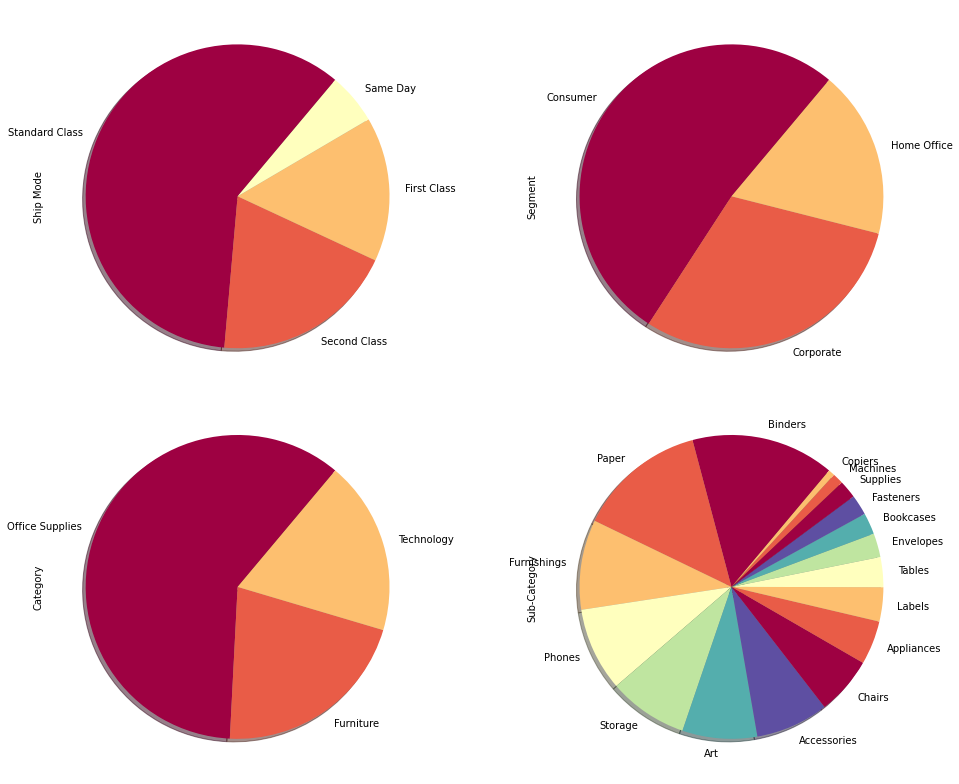

In [22]:
cmap=plt.get_cmap('Spectral')
colors=[cmap(i) for i in np.linspace(0,1,7)]
feat=['Ship Mode','Segment','Category','Sub-Category']
fig=plt.figure(figsize=(15,15))
for i,col in enumerate(feat):
    fig.add_subplot(2,2,i+1)
    fig.set_size_inches(16,11)
    df[col].value_counts().plot.pie(shadow=True,colors=colors,startangle=50)
    plt.tight_layout()

## From above plots we infer that the most frequent ship mode is standard class. Secondly Office supplies are in demand by the customers compared to furniture and Technology. Thirdly Binders are the most sold products in the Sub Category section

In [68]:
X=pd.DataFrame(df.groupby(['Region'])['State'].value_counts())
X.rename(columns={'State':'Counts'})

Counts
Region  State                       
Central Texas                    985
        Illinois                 492
        Michigan                 255
        Indiana                  149
        Wisconsin                110
        Minnesota                 89
        Missouri                  66
        Oklahoma                  66
        Nebraska                  38
        Iowa                      30
        Kansas                    24
        South Dakota              12
        North Dakota               7
East    New York                1128
        Pennsylvania             587
        Ohio                     469
        Massachusetts            135
        New Jersey               130
        Maryland                 105
        Delaware                  96
        Connecticut               82
        Rhode Island              56
        New Hampshire             27
        Vermont                   11
        District of Columbia      10
        Maine                      8
        West Virginia              4
South   Florida                  383
        North Carolina           249
        Virginia                 224
        Georgia                  184
        Tennessee                183
        Kentucky                 139
        Alabama                   61
        Arkansas                  60
        Mississippi               53
        Louisiana                 42
        South Carolina            42
West    California              2001
        Washington               506
        Arizona                  224
        Colorado                 182
        Oregon                   124
        Utah                      53
        Nevada                    39
        New Mexico                37
        Idaho                     21
        Montana                   15
        Wyoming                    1

### Below I have plotted charts showing distribution of Sales,Profit and Discount over various regions such that to conclude which region has maximum sales, maximum profit and maximum Discount . We infer:-
* ### Maximum Sales: West Region  
  ###               State: California
* ### Maximum Profit: East Region 
  ###                State: Pennsylvania
* ### Maximum Discount incured:Central Region
  ###                         State:Texas

In [279]:
cols=['Sales','Profit','Discount']
for i,col in enumerate(cols):
    pie=px.pie(data_frame=df,names='Region',values=df[col],
           hover_data=['State'],
           hole=0.35,
           color_discrete_sequence=px.colors.qualitative.Vivid,
           width=600,
           height=600)
    pie.update_layout(
        annotations=[dict(text=col,x=0.52,y=0.45,font_size=30)]
    )
    pio.show(pie)

### Here we analyze Sales distribution over SubCategory . This distribution is analyzed and Average Sales  is returned per Subcategory.

<AxesSubplot:xlabel='Avg_Sales', ylabel='Sub-Category'>

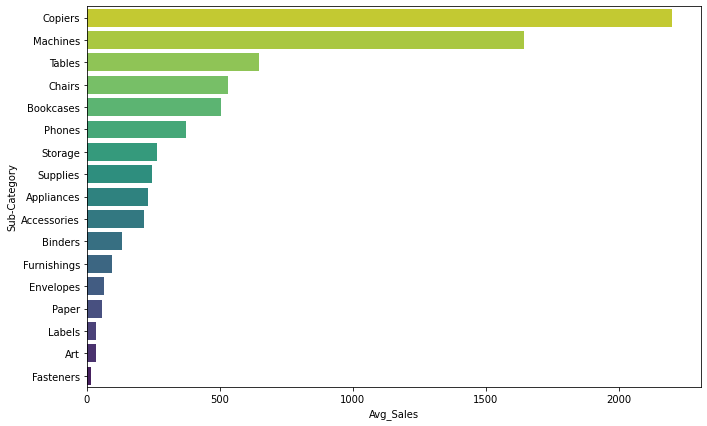

In [351]:
X=pd.DataFrame(df.groupby(['Sub-Category'])['Sales'].mean().sort_values(ascending=False))
X.rename(columns={'Sales':'Avg_Sales'},inplace=True)
plt.figure(figsize=(11,7))
sns.barplot(data=X,x='Avg_Sales',y=X.index,palette='viridis_r')

### Here is a ditribution of Profit vs Sales for all the states. We notice that Indiana has made the max profit and the sales distribution of this state also seem to be maximum. Second we have florida with the Maximum sales of all with average profit

In [244]:
px.scatter(data_frame=df,x='Profit',y='Sales',
           size='Quantity',
           color='State',
           color_discrete_sequence=px.colors.qualitative.Safe,
           opacity=0.8,
           width=900,
           height=500)

### Below is Distribution of Average profit made by each State and we can infer that Vermont has the maximum average profit made as compared to others.

<AxesSubplot:xlabel='Avg_profit', ylabel='State'>

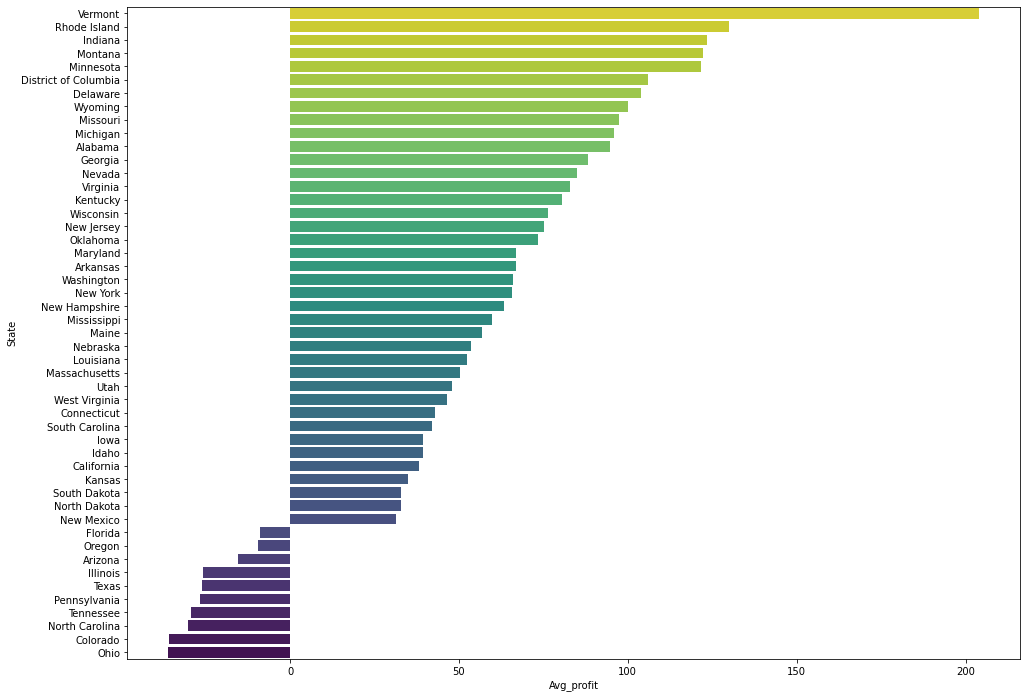

In [331]:
plt.figure(figsize=(16,12))
x=pd.DataFrame(df.groupby('State')['Profit'].mean().sort_values(ascending=False))
x.rename(columns={'Profit':'Avg_profit'},inplace=True)
sns.barplot(data=x,x='Avg_profit',y=x.index,palette='viridis_r')


### Below is a barplot illustrating the Sales made per State. Here I have taken the sum of Sales and sorted in descending order to plot the maximum sales , in this case California has the max Sales

<AxesSubplot:xlabel='Sales', ylabel='State'>

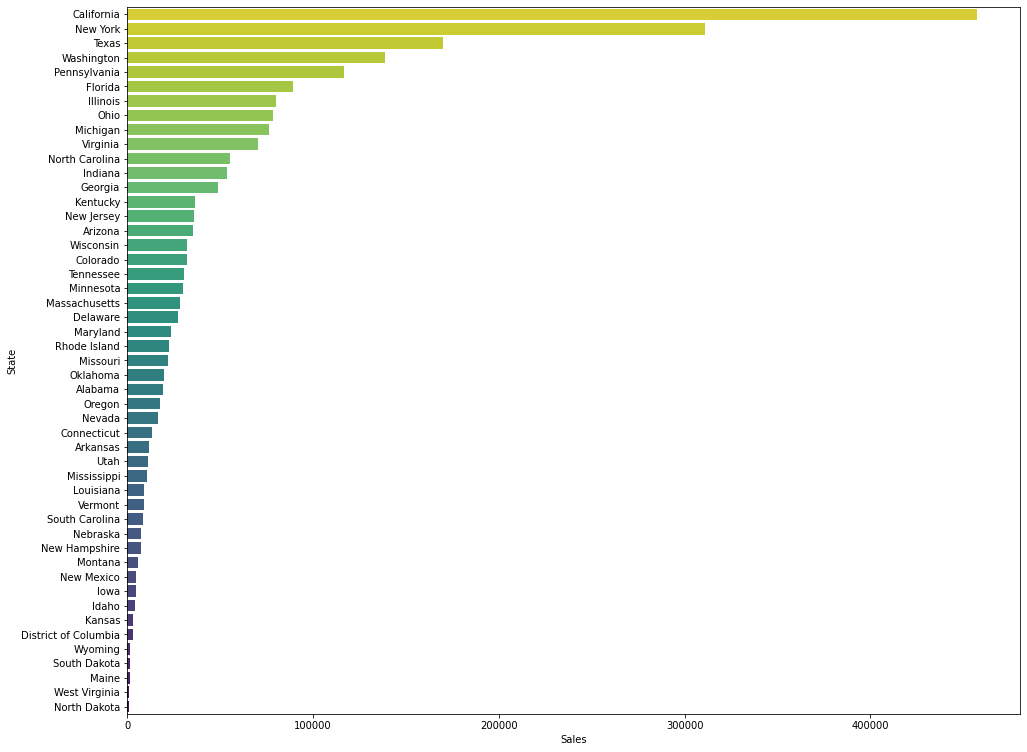

In [332]:
plt.figure(figsize=(16,13))
x=pd.DataFrame(df.groupby('State')['Sales'].sum().sort_values(ascending=False))
x.reset_index()
sns.barplot(data=x,x='Sales',y=x.index,palette='viridis_r')

## CONCLUSION
### Profit can be made in regions moslty south in state like Kentucky and Sales can also be improved in those areas where sales as well as profit are a bit low as ### compared to other regions